In [1]:
%matplotlib notebook
from bayes_opt import BayesianOptimization
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm


# plt.style.use(['dark_background'])

In [2]:
def target(x1,x2):
    return  - 1 * ((4 - (2.1 * (x1**2)) + (x1**4)/3) * (x1**2) + x1*x2 + (-4 + 4*(x2**2)) * x2**2)

In [3]:
X1Vals = np.linspace(-3,3,100)
X2Vals = np.linspace(-2,2,100)
X1, X2 = np.meshgrid(X1Vals, X2Vals)
Y = target(X1,X2)

<IPython.core.display.Javascript object>


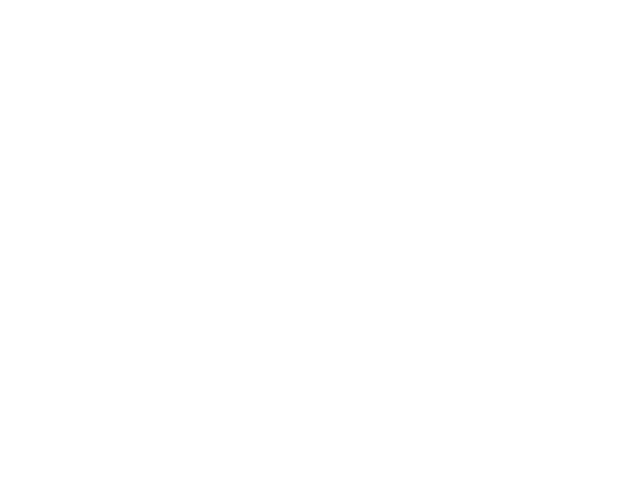

<IPython.core.display.Javascript object>


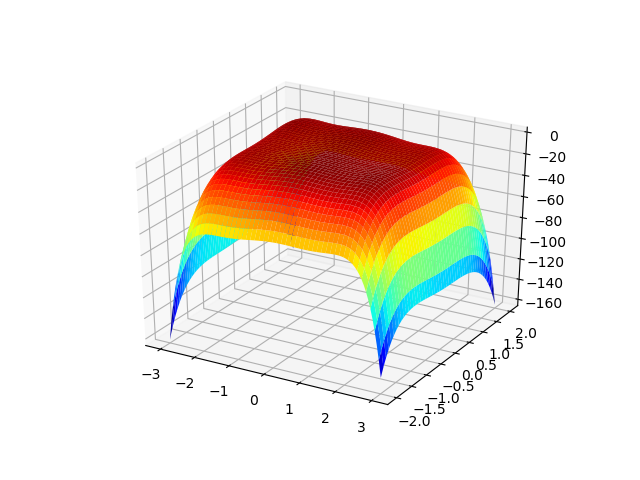

In [4]:
plt.clf()
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, label='6C', cmap="jet")
plt.show()

In [42]:
bo = BayesianOptimization(target, {'x1':(-3,3), 'x2': (-2,2)})

In [43]:
bo.maximize(init_points=2, n_iter=0, acq='ei', xi=1e-4)

Initialization
-----------------------------------------------------
 Step |   Time |      Value |        x1 |        x2 | 
    1 | 00m00s |   -4.79615 |    2.1826 |   -0.8686 | 
    2 | 00m00s |  -28.16692 |   -2.4942 |   -1.1342 | 
Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |        x1 |        x2 | 


In [49]:
def posterior(bo, x):
    bo.gp.fit(bo.X, bo.Y)
    mu, sigma = bo.gp.predict(x, return_std=True)
    return mu, sigma

In [58]:
def plot_gp(bo, X1, X2, y):
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('Gaussian Process and Utility Function After {} Steps'.format(len(bo.X)), fontdict={'size':30})
    ax = fig.add_subplot(211, projection='3d')
    XX = np.array([[X1.flatten()], [X2.flatten()]]).reshape(-1,2)
    print(XX.shape)
    mu, sigma = posterior(bo, XX)
    ax.plot_surface(X1, X2, Y, label='Target', cmap="jet")
    ax.scatter(bo.X[:,0].flatten(), bo.X[:,1].flatten(), bo.Y, s=55, c="b", marker="o")

Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |        x1 |        x2 | 
   23 | 00m01s |   -0.18368 |    1.8696 |   -0.8616 | 
   24 | 00m01s |    1.01968 |    0.1454 |   -0.7203 | 
   25 | 00m01s |    1.01667 |    0.0587 |   -0.7470 | 
   26 | 00m01s |    1.03100 |    0.0931 |   -0.7044 | 
   27 | 00m01s |    0.56217 |    0.3896 |   -0.5816 | 


<IPython.core.display.Javascript object>


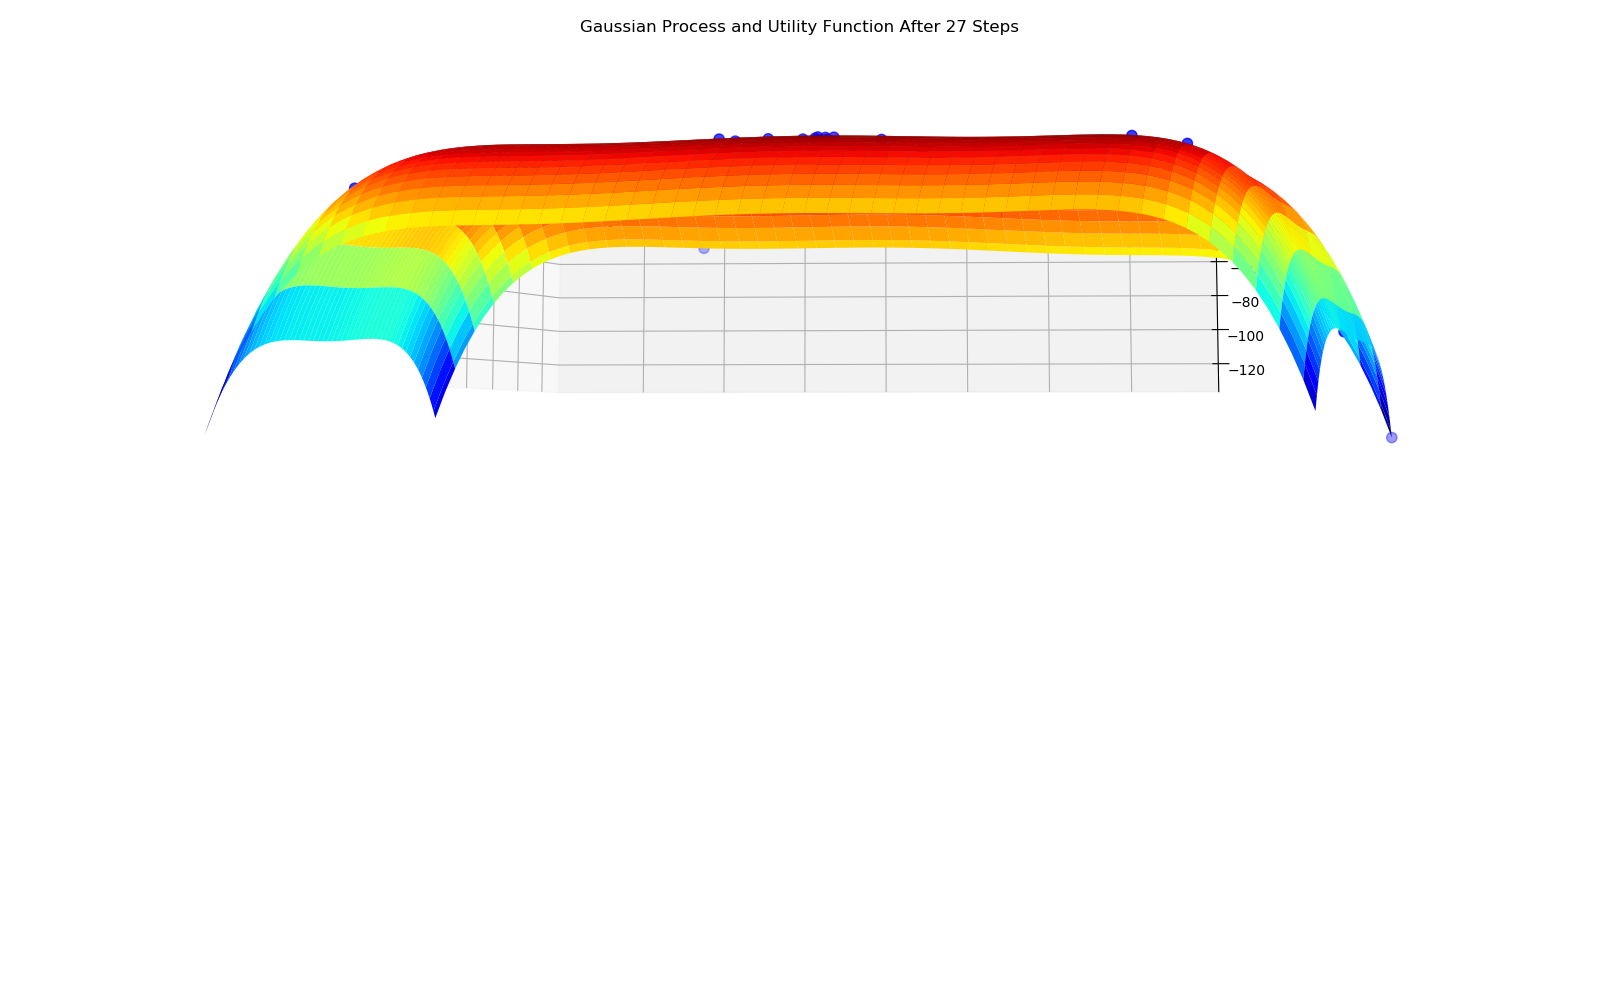

(10000, 2)


In [64]:
bo.maximize(init_points=2, n_iter=5, acq='ei', xi=1e-4)
plot_gp(bo, X1, X2, Y)